In [4]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statistics as stat

In [5]:
df=pd.read_csv('S:\MMCOE\DSBDA MINI PROJECT\IPL_Ball_by_Ball_2008_2022.csv')
df1=pd.read_csv('S:\MMCOE\DSBDA MINI PROJECT\IPL_Matches_2008_2022.csv')

In [6]:
df.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [7]:
df1.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [8]:
df['BattingTeam'].unique()

array(['Rajasthan Royals', 'Gujarat Titans',
       'Royal Challengers Bangalore', 'Lucknow Super Giants',
       'Sunrisers Hyderabad', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Delhi Daredevils', 'Rising Pune Supergiant',
       'Gujarat Lions', 'Rising Pune Supergiants', 'Pune Warriors',
       'Deccan Chargers', 'Kochi Tuskers Kerala'], dtype=object)

> **Let's create a function to merging old and new team names**

In [9]:
def change_team_name(x):
    if x=='Deccan Chargers':
        return 'Sunrisers Hyderabad'
    elif x=='Pune Warriors' or x=='Rising Pune Supergiant':
        return 'Rising Pune Supergiants'
    elif x=='Delhi Daredevils':
        return 'Delhi Capitals'
    elif x=='Kings XI Punjab':
        return 'Punjab Kings'
    else:
        return x
df['BattingTeam']=df['BattingTeam'].apply(change_team_name)
df1['Team1']=df1['Team1'].apply(change_team_name)
df1['Team2']=df1['Team2'].apply(change_team_name)
df1['TossWinner']=df1['TossWinner'].apply(change_team_name)
df1['WinningTeam']=df1['WinningTeam'].apply(change_team_name)

C:\Users\Hp\AppData\Local\Temp\ipykernel_7396\3683345178.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,3,i+1)


ValueError: num must be an integer with 1 <= num <= 12, not 13

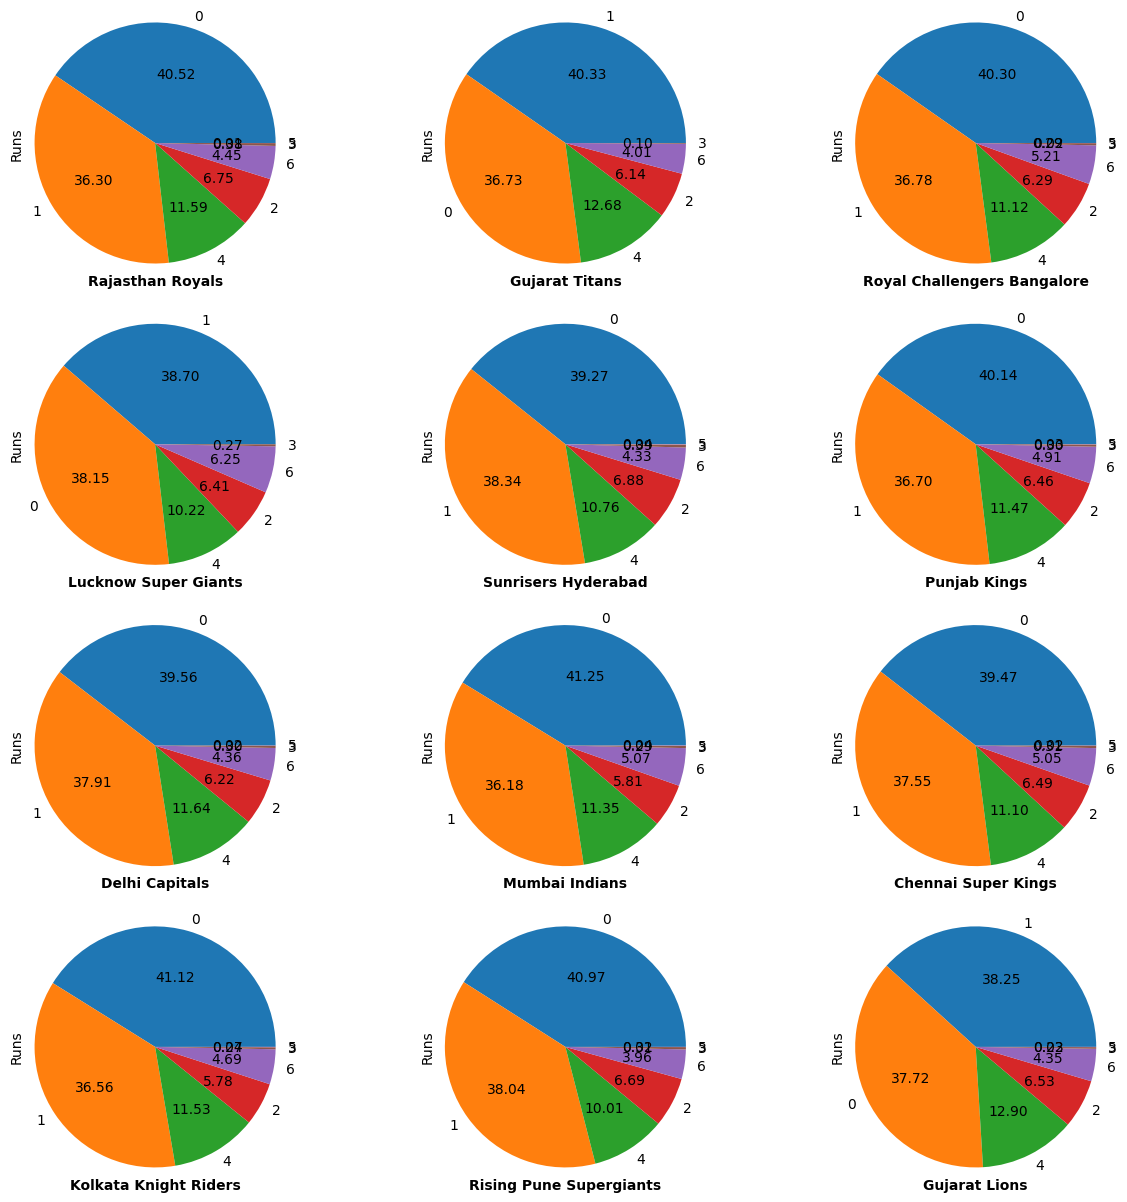

In [10]:
xlables=list(df['BattingTeam'].unique())
plt.figure(figsize=(15,15))
plt.xticks(rotation = 90)
plt.grid(visible=True)
plt.title('Boundary percentage of each team',size=20,fontweight='bold')
for i in range(0,len(xlables)):
    plt.subplot(4,3,i+1)
    df[df['BattingTeam']==xlables[i]]['batsman_run'].value_counts().plot.pie(autopct='%.2f',radius=1.2)
    plt.xlabel(xlables[i],fontweight='bold')
    plt.ylabel('Runs')
plt.suptitle('Boundary Percentage',size=20,weight='bold')

The batsman has scored 5784 in 191 matches with and average of 34.634730538922156 and strike rate of 123.37883959044369


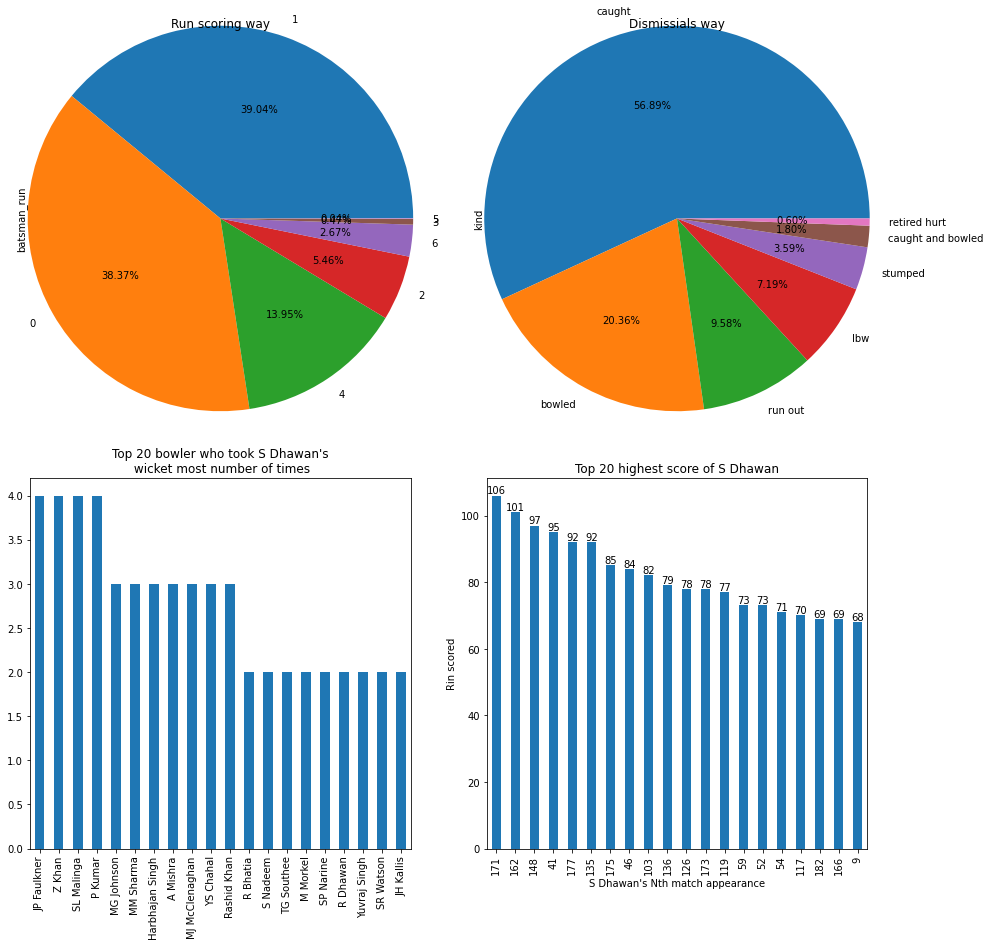

In [ ]:
batter_name='S Dhawan'
batter_stat=df[df['batter']==batter_name]
bowler_wicket=['caught', 'lbw', 'bowled', 'caught and bowled','stumped','hit wicket']
batter_run=sum(batter_stat['batsman_run'])
matches_played=batter_stat.groupby('ID').count().shape[0]
given_out=sum(batter_stat.groupby('ID').sum().reset_index(drop=True)['isWicketDelivery'])
strike_rate=100*(batter_run/batter_stat.shape[0])
print(f'The batsman has scored {batter_run} in {matches_played} matches with and average of {batter_run/given_out} and strike rate of {strike_rate}')
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title('Run scoring way')
batter_stat['batsman_run'].value_counts().plot.pie(autopct='%.2f%%',radius=1.3)
plt.subplot(2,2,2)
plt.title('Dismissials way')
batter_stat['kind'].value_counts().plot.pie(autopct='%.2f%%',radius=1.3)
plt.subplot(2,2,3)
plt.title(f"Top 20 bowler who took {batter_name}'s\n wicket most number of times")
batter_stat[batter_stat['kind'].isin(bowler_wicket)]['bowler'].value_counts().head(20).plot.bar()
plt.subplot(2,2,4)
plt.title(f'Top 20 highest score of {batter_name}')
plt.xlabel(f"{batter_name}'s Nth match appearance")
plt.ylabel('Rin scored')
ax=batter_stat.groupby('ID').sum().reset_index().sort_values('batsman_run',ascending=False).head(20)['batsman_run'].plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i,)

SL Malinga has taken 170 in 122 matches with an economy of 6.4438466711499665 and strike rate of 17.49411764705882
And the top 5 performances are as follows: 


,Match no,Wickets Taken,run given
0,26,5,12
1,113,5,31
2,91,4,30
3,42,4,14
4,19,4,20


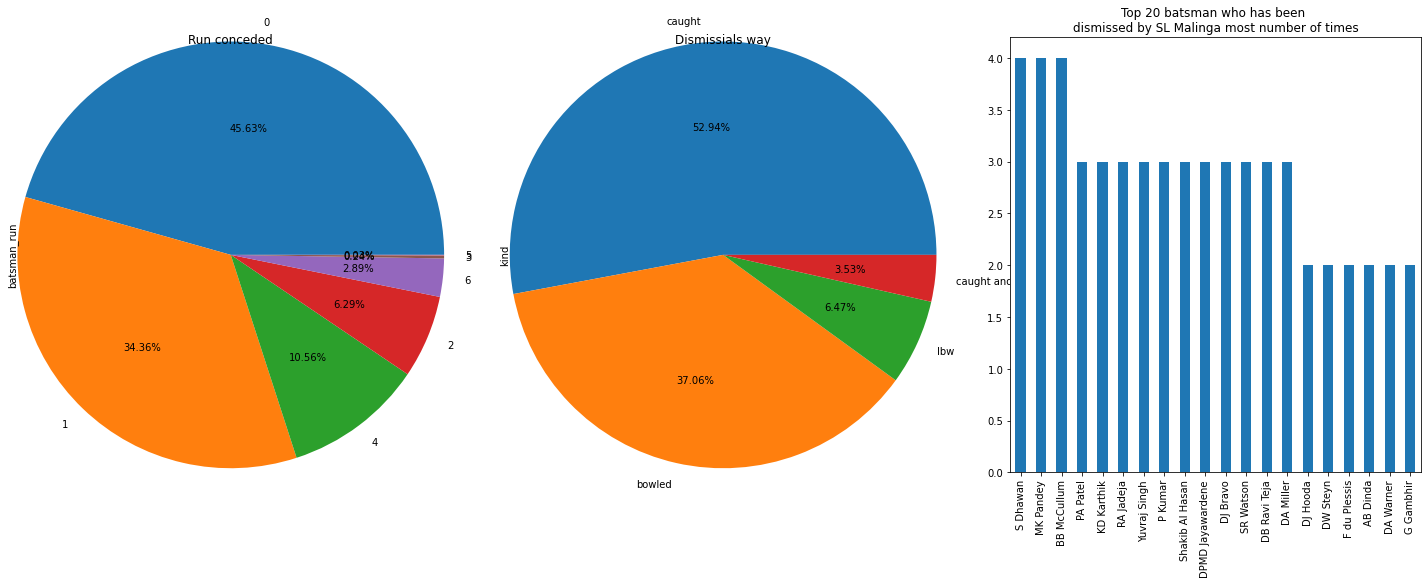

In [ ]:
bowler_name='SL Malinga'
bowler_wicket_kind=['caught', 'lbw', 'bowled', 'caught and bowled','stumped','hit wicket']
bowler_delivery=df[df['bowler']==bowler_name]
bowler_wickets=bowler_delivery[bowler_delivery['kind'].isin(bowler_wicket_kind)]

wickets_taken=sum(bowler_wickets['isWicketDelivery'])
matches_played=bowler_delivery.groupby('ID').count().shape[0]
balls_bowled=df[df['bowler']==bowler_name].shape[0]
run_conceded=sum(bowler_delivery['batsman_run'])
economy=(run_conceded/balls_bowled)*6
strike_rate=balls_bowled/wickets_taken
print(f'{bowler_name} has taken {wickets_taken} in {matches_played} matches with an economy of {economy} and strike rate of {strike_rate}')
print('And the top 5 performances are as follows: ')
plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
plt.title('Run conceded')
bowler_delivery['batsman_run'].value_counts().plot.pie(autopct='%.2f%%',radius=1.3)
plt.subplot(1,3,2)
plt.title('Dismissials way')
bowler_wickets['kind'].value_counts().plot.pie(autopct='%.2f%%',radius=1.3)
plt.subplot(1,3,3)
plt.title(f"Top 20 batsman who has been \ndismissed by {bowler_name} most number of times")
bowler_wickets['batter'].value_counts().head(20).plot.bar()
data=bowler_delivery.groupby('ID').sum().reset_index().sort_values('isWicketDelivery',ascending=False).head(20)[['isWicketDelivery','batsman_run']].reset_index()
data.rename(columns={'index':'Match no','isWicketDelivery':'Wickets Taken','batsman_run':'run given'},inplace=True)
display(data.head(5))

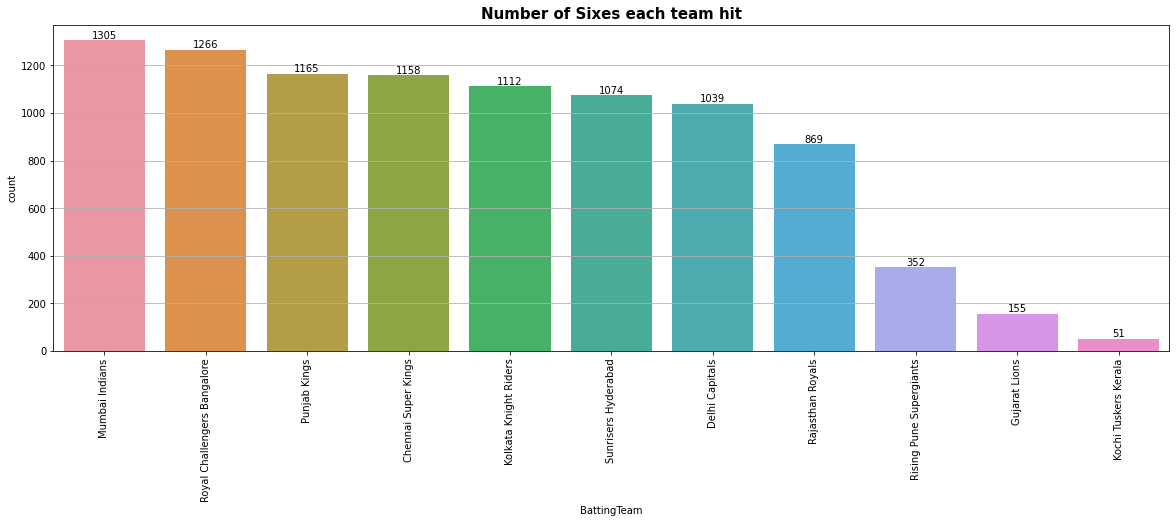

In [ ]:
plt.figure(figsize=(20,6))
plt.xticks(rotation = 90)
plt.title('Number of Sixes each team hit',size=15,fontweight='bold')
plt.grid(visible=True)
ord=list(df[df['batsman_run']==6]['BattingTeam'].value_counts().index)
ax=sns.countplot(data=df[df['total_run']==6],x='BattingTeam',order=ord)
for i in ax.containers:
    ax.bar_label(i,)

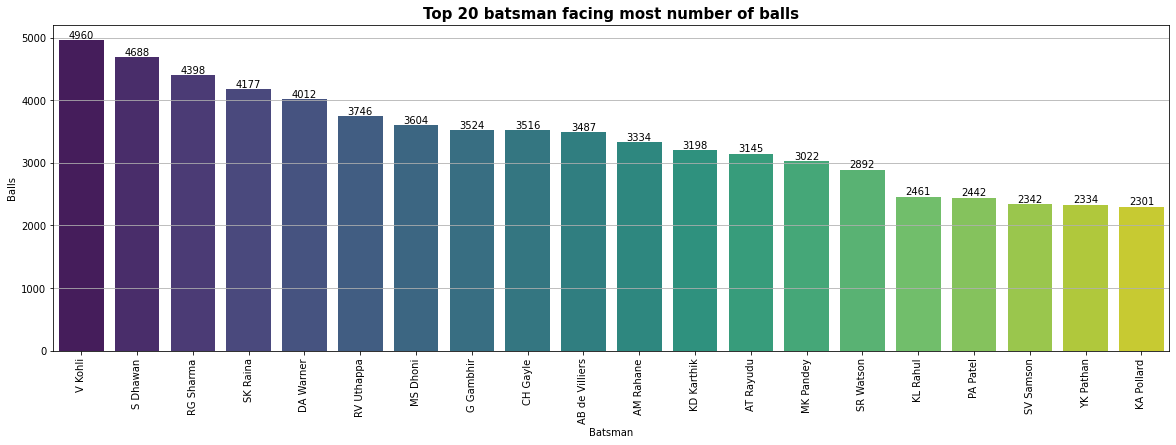

In [ ]:
d={'Batsman':(list(df['batter'].value_counts().index)),'Balls':(df['batter'].value_counts())}
ballsfaced=pd.DataFrame(data=d)
ballsfaced.reset_index(inplace=True,drop=True)
plt.figure(figsize=(20,6))
plt.title('Top 20 batsman facing most number of balls',size=15,fontweight='bold')
plt.xticks(rotation = 90)
plt.grid(visible=True)
ax=sns.barplot(data=ballsfaced.head(20),x='Batsman',y='Balls',palette='viridis')
for i in ax.containers:
    ax.bar_label(i,)

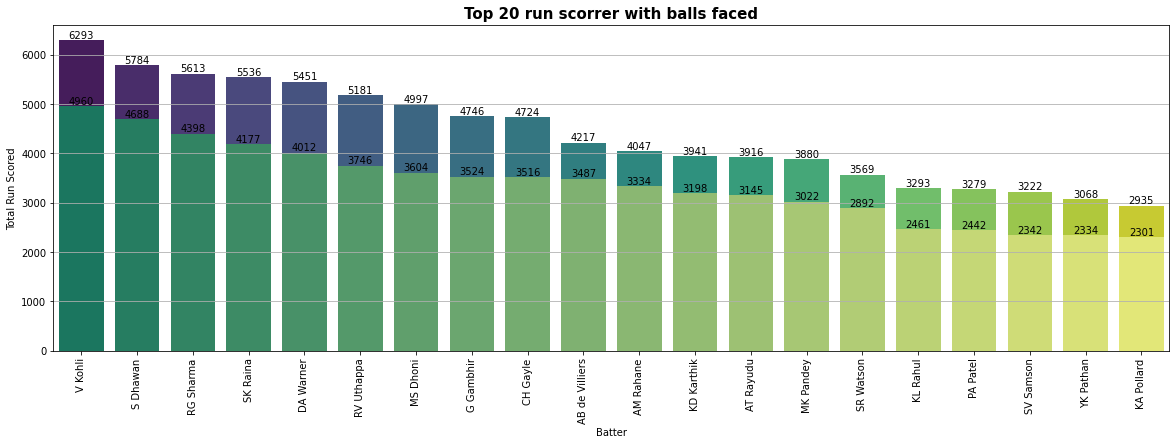

In [ ]:
run_scored=df.groupby('batter').sum()
run_scored.reset_index(inplace=True)
fig=plt.figure(figsize=(20,6))
plt.title('Top 20 run scorrer with balls faced',size=15,fontweight='bold')
plt.xticks(rotation = 90)
plt.grid(visible=True)
ax=sns.barplot(data=run_scored.sort_values('batsman_run',ascending=False).head(20)
               ,x='batter',y='batsman_run',palette='viridis')
bx=sns.barplot(data=ballsfaced.head(20),x='Batsman',
            y='Balls',palette="summer",ax=ax)
bx.set(xlabel='Batter', ylabel='Total Run Scored')
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
df['kind'].unique()

array([nan, 'caught', 'lbw', 'bowled', 'run out', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

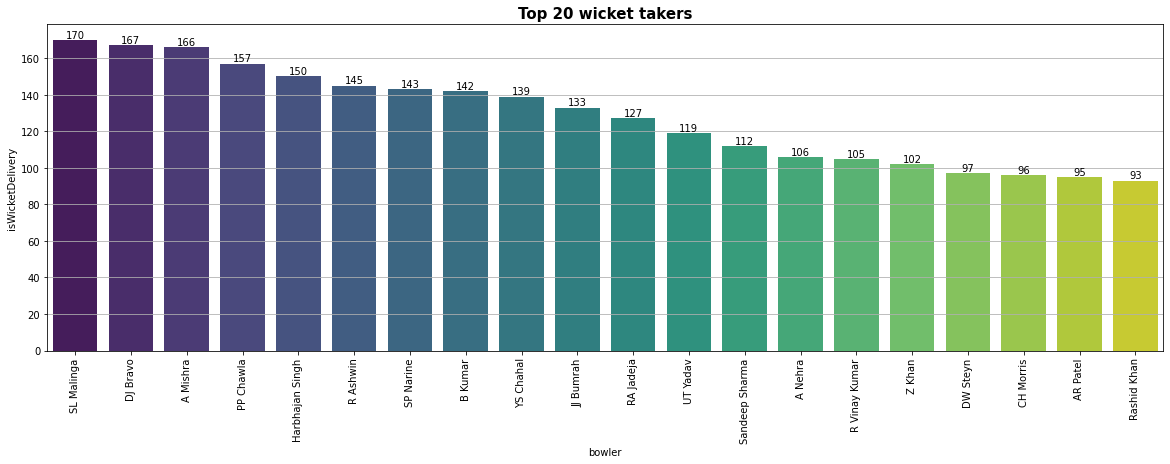

In [ ]:
wickets_taken=df[(df['kind']!='run out')&(df['kind']!='retired hurt')
                 &(df['kind']!='obstructing the field')].groupby('bowler').sum()
wickets_taken.reset_index(inplace=True)
plt.figure(figsize=(20,6))
plt.title('Top 20 wicket takers',size=15,fontweight='bold')
plt.xticks(rotation = 90)
plt.grid(visible=True)
ax=sns.barplot(data=wickets_taken.sort_values('isWicketDelivery',ascending=False).head(20),
            x='bowler',y='isWicketDelivery',palette='viridis')
for i in ax.containers:
    ax.bar_label(i,)

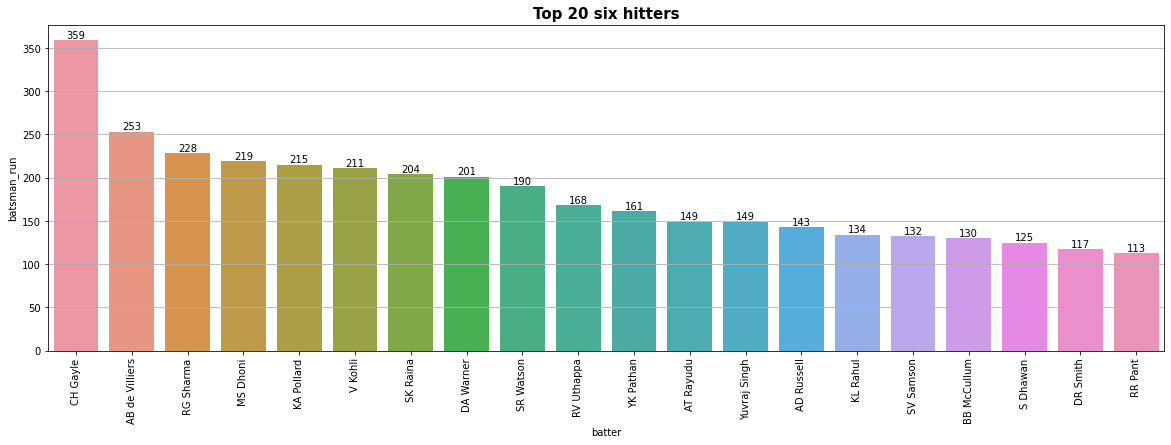

In [ ]:
sixes=df[df['batsman_run']==6].groupby('batter').count()
sixes.reset_index(inplace=True)
sixes=sixes.sort_values('batsman_run',ascending=False)
plt.figure(figsize=(20,6))
plt.title('Top 20 six hitters',size=15,fontweight='bold')
plt.xticks(rotation = 90)
plt.grid(visible=True)
ax=sns.barplot(data=sixes.head(20),x='batter',y='batsman_run')
for i in ax.containers:
    ax.bar_label(i,)

 > **head to head battles user can give customized input but static input is given for runtime issue**

In [ ]:
try:
    #batsman=input('Please Enter the batsman name: ')
    #bowler=input('Please Enter the bowler name: ')
    batsman='S Dhawan'
    bowler='SL Malinga'
    batsman_scored=df[(df['batter']==batsman) & (df['bowler']==bowler)].groupby('batter').sum()['total_run'][0]
    bowler_wickets=df[(df['batter']==batsman) & (df['bowler']==bowler) & (df['isWicketDelivery']==1)].shape[0]
    ball_faced=df[(df['batter']==batsman) & (df['bowler']==bowler)].count()[0]
    NoOfFours=df[(df['batter']==batsman) & (df['bowler']==bowler) & (df['batsman_run']==4)].count()[0]
    NoOfSixes=df[(df['batter']==batsman) & (df['bowler']==bowler) & (df['batsman_run']==6)].count()[0]
    StrikeRate=(batsman_scored/ball_faced)*100
    if bowler_wickets==0:
        average='Infinite'
    else:
        average=batsman_scored/bowler_wickets
    d={'Rivalary':(batsman +" vs "+ bowler),'Balls':(ball_faced),'Run Scored':(batsman_scored),
       'Dismissals':(bowler_wickets),'Fours':(NoOfFours) ,'Sixes':(NoOfSixes),'Strike Rate':(StrikeRate),'Average':(average)}
    FinalStat=pd.DataFrame(data=d,index=[1])
    display(FinalStat)
except:
    print('Please enter bowler and batter name as mentioned in data')

,Rivalary,Balls,Run Scored,Dismissals,Fours,Sixes,Strike Rate,Average
1,S Dhawan vs SL Malinga,69,86,4,10,1,124.637681,21.5


In [ ]:
df1.head(5)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,N,Chennai Super Kings,Runs,27.0,NaN,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari...",Nitin Menon,RK Illingworth
1,1254116,Sharjah,2021-10-13,2021,Qualifier 2,Delhi Capitals,Kolkata Knight Riders,Sharjah Cricket Stadium,Kolkata Knight Riders,field,N,Kolkata Knight Riders,Wickets,3.0,NaN,VR Iyer,"['PP Shaw', 'S Dhawan', 'MP Stoinis', 'SS Iyer...","['Shubman Gill', 'VR Iyer', 'N Rana', 'RA Trip...",KN Ananthapadmanabhan,MA Gough
2,1254115,Sharjah,2021-10-11,2021,Eliminator,Royal Challengers Bangalore,Kolkata Knight Riders,Sharjah Cricket Stadium,Royal Challengers Bangalore,bat,N,Kolkata Knight Riders,Wickets,4.0,NaN,SP Narine,"['D Padikkal', 'V Kohli', 'KS Bharat', 'GJ Max...","['Shubman Gill', 'VR Iyer', 'RA Tripathi', 'N ...",CB Gaffaney,VK Sharma
3,1254114,Dubai,2021-10-10,2021,Qualifier 1,Delhi Capitals,Chennai Super Kings,Dubai International Cricket Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,4.0,NaN,RD Gaikwad,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'AR Patel',...","['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...",Nitin Menon,RK Illingworth
4,1254088,Abu Dhabi,2021-10-08,2021,55,Mumbai Indians,Sunrisers Hyderabad,"Zayed Cricket Stadium, Abu Dhabi",Mumbai Indians,bat,N,Mumbai Indians,Runs,42.0,NaN,Ishan Kishan,"['RG Sharma', 'Ishan Kishan', 'HH Pandya', 'KA...","['JJ Roy', 'Abhishek Sharma', 'MK Pandey', 'Mo...",Tapan Sharma,VK Sharma


 **Head to head encounters**

In [ ]:
#team1=input('Please enter the team name: ')
#team2=input('Please enter the opponent name: ')
team1='Mumbai Indians'
team2='Chennai Super Kings'
h2h=pd.concat([df1[df1['Team1']==team1][df1['Team2']==team2],df1[df1['Team1']==team2][df1['Team2']==team1]],ignore_index=True)
team1_won=h2h[h2h['WinningTeam']==team1].shape[0]
team2_won=h2h[h2h['WinningTeam']==team2].shape[0]
print(f'{team1} won {team1_won} matches against {team2} from {h2h.shape[0]} matches')

Mumbai Indians won 19 matches against Chennai Super Kings from 32 matches


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


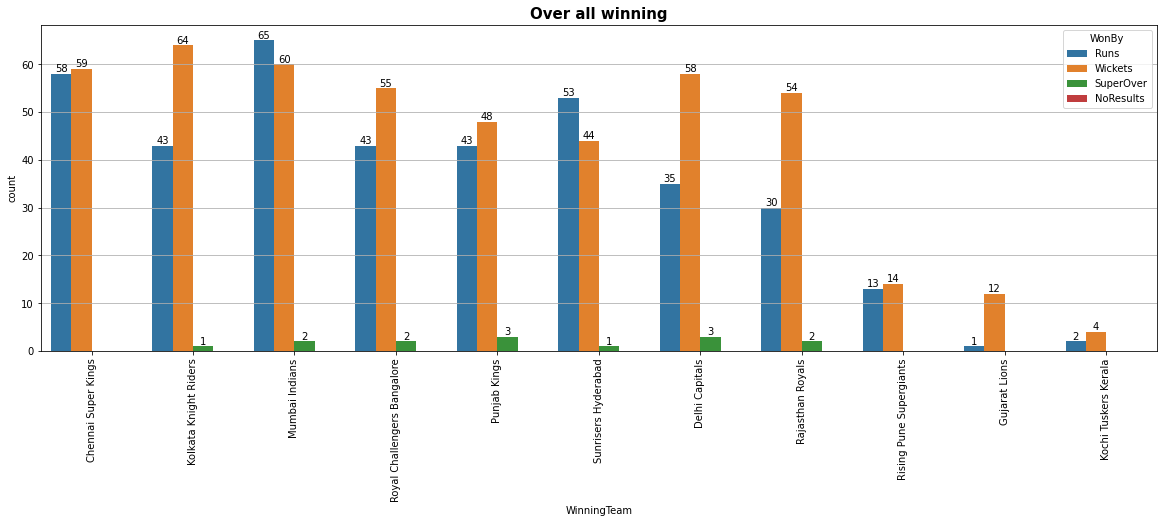

In [ ]:
plt.figure(figsize=(20,6))
plt.title('Over all winning',size=15,fontweight='bold')
plt.xticks(rotation = 90)
plt.grid(visible=True)
ax=sns.countplot(data=df1,x='WinningTeam',hue='WonBy')
for i in ax.containers:
    ax.bar_label(i,)

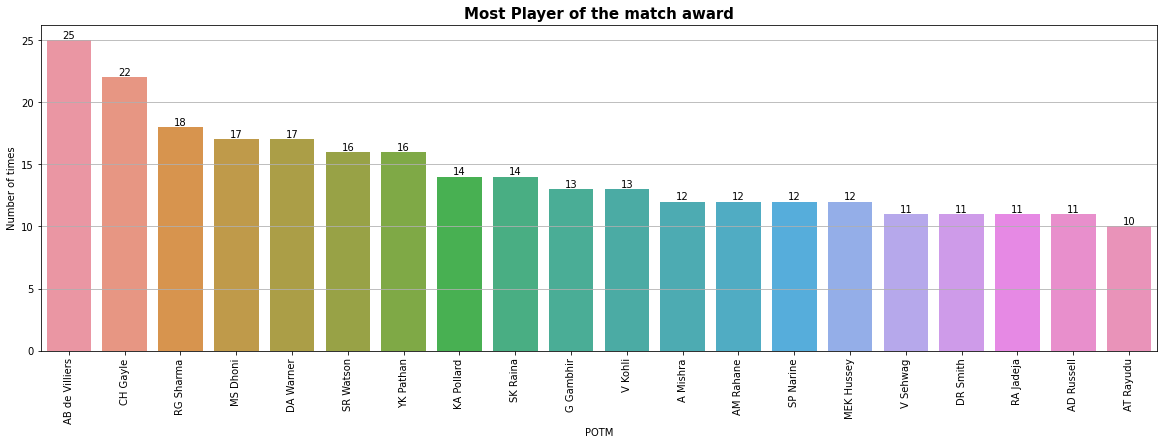

In [ ]:
potm=pd.DataFrame({'POTM':df1['Player_of_Match'].value_counts().index,
                  'Number of times':df1['Player_of_Match'].value_counts()})
potm.reset_index(inplace=True,drop=True)
plt.figure(figsize=(20,6))
plt.title('Most Player of the match award',size=15,fontweight='bold')
plt.xticks(rotation = 90)
plt.grid(visible=True)
ax=sns.barplot(data=potm.head(20),x='POTM',y='Number of times')
for i in ax.containers:
    ax.bar_label(i,)